In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))
import scipy.stats as stats
import env
from prepare import handle_nulls
from preprocessing import create_features, split_df

In [2]:
df = pd.read_csv('playlist-offset-0-2700.csv', index_col=0)

### Summarize Data

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2.0,-8.544,1.0,0.3000,0.000000,0.244,0.351,82.512,232803.0,4.0,True,43.0,1.0
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9.0,-6.912,1.0,0.2330,0.000000,0.114,0.265,148.077,193920.0,4.0,True,61.0,1.0
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0.0,-6.450,0.0,0.1450,0.000000,0.409,0.717,160.011,254390.0,4.0,True,22.0,1.0
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0.0,-4.783,0.0,0.1080,0.000000,0.364,0.771,140.059,250493.0,4.0,True,62.0,1.0
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11.0,-5.470,0.0,0.0773,0.000001,0.106,0.800,160.003,261933.0,4.0,True,45.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2800 non-null   object 
 1   album             2800 non-null   object 
 2   release_date      2800 non-null   object 
 3   track_name        2800 non-null   object 
 4   track_id          2800 non-null   object 
 5   danceability      2799 non-null   float64
 6   energy            2799 non-null   float64
 7   key               2799 non-null   float64
 8   loudness          2799 non-null   float64
 9   mode              2799 non-null   float64
 10  speechiness       2799 non-null   float64
 11  instrumentalness  2799 non-null   float64
 12  liveness          2799 non-null   float64
 13  valence           2799 non-null   float64
 14  tempo             2799 non-null   float64
 15  duration_ms       2799 non-null   float64
 16  time_signature    2799 non-null   float64


In [5]:
df = create_features(handle_nulls(df))

In [6]:
df = df.dropna()

In [53]:
# change explicit column to int
df['explicit'] = df.explicit.astype('int')
df['is_featured_artist'] = df.is_featured_artist.astype('int')
df['disc_number'] = df.disc_number.astype('int')
df['mode'] = df['mode'].astype('int')
df['key'] = df.key.astype('int')
df['duration_seconds'] = df.duration_seconds.astype('int')
df['duration_minutes'] = df.duration_minutes.astype('int')
df['duration_ms'] = df.duration_ms.astype('int')
df['popularity'] = df.popularity.astype('int')
df['time_signature'] = df.time_signature.astype('int')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              2799 non-null   object 
 1   album               2799 non-null   object 
 2   release_date        2799 non-null   object 
 3   track_name          2799 non-null   object 
 4   track_id            2799 non-null   object 
 5   danceability        2799 non-null   float64
 6   energy              2799 non-null   float64
 7   key                 2799 non-null   int64  
 8   loudness            2799 non-null   float64
 9   mode                2799 non-null   int64  
 10  speechiness         2799 non-null   float64
 11  instrumentalness    2799 non-null   float64
 12  liveness            2799 non-null   float64
 13  valence             2799 non-null   float64
 14  tempo               2799 non-null   float64
 15  duration_ms         2799 non-null   int64  
 16  time_s

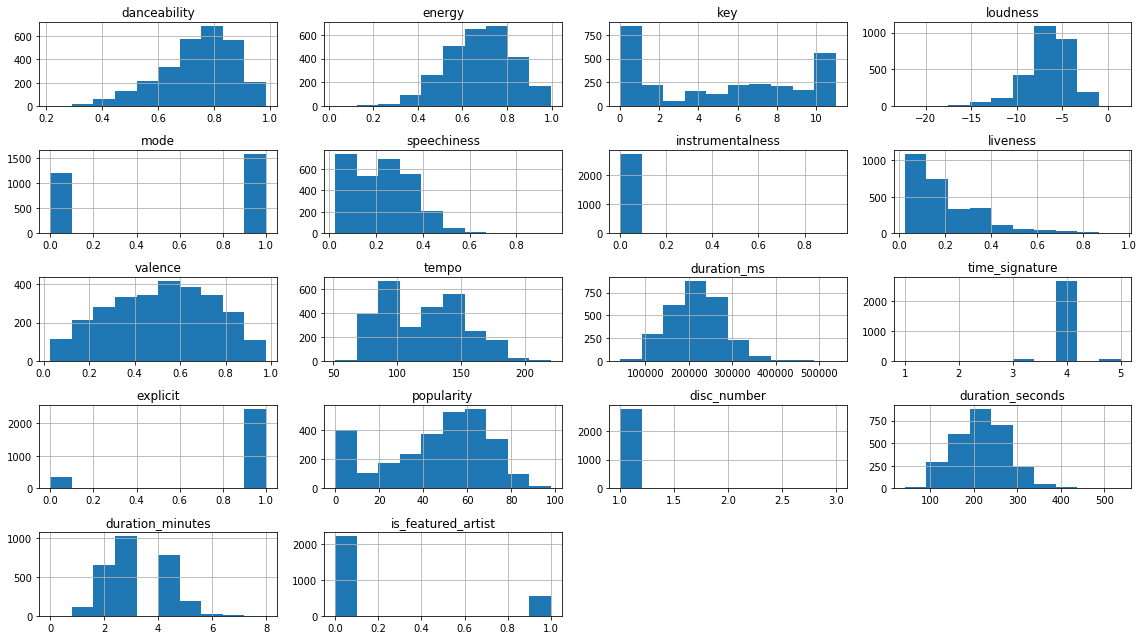

In [56]:
# distribution of variables
df.hist()
plt.tight_layout()

In [57]:
# value counts for all variables except 2
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

2005-01-01    57
2004-01-01    46
2006-01-01    40
2012-01-01    38
2001-01-01    32
              ..
2017-04-20     1
2001-09-11     1
2018-05-22     1
2016-12-27     1
2018-06-22     1
Name: release_date, Length: 996, dtype: int64 

grillz                                                                    5
party up                                                                  4
look at me!                                                               3
it was a good day                                                         3
don't sweat the technique                                                 3
                                                                         ..
it's goin' down (feat. rappin' 4-tay, e-40, b-legit & mack 10) - remix    1
hear no evil (feat. future)                                               1
d'evils                                                                   1
snitch                                                                    1
i'll 

In [58]:
train, validate, test = split_df(df)

train shape:  (1964, 26) , validate shape:  (555, 26) , test shape:  (280, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [59]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
2101,luniz,luniz - the lost tapes 2,2009-03-03,i got 5 on it,1rS31P08Cn64Rn7pnMh5S5,0.631,0.687,10,-7.870,0,...,4,1,0,1,245,4,0,2009,03,03
970,reason,new beginnings,2020-10-09,extinct,70hDklZStSazrExPjHJPfR,0.630,0.694,2,-6.593,1,...,4,1,58,1,222,3,0,2020,10,09
2028,hardo,trapnese,2016-11-25,who ya gang,5UShjdfool3o6TOMi2PeJR,0.924,0.645,10,-4.119,0,...,4,1,28,1,237,3,0,2016,11,25
1727,yella beezy,baccend beezy,2019-07-19,restroom occupied (feat. chris brown),0l9QUT8anYlBo4yD3PXfPM,0.711,0.683,6,-5.039,1,...,4,1,60,1,216,3,1,2019,07,19
1976,migos,culture,2017-01-27,t-shirt,7KOlJ92bu51cltsD9KU5I7,0.865,0.687,10,-3.744,0,...,4,1,68,1,242,4,0,2017,01,27


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 2101 to 1799
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              1964 non-null   object 
 1   album               1964 non-null   object 
 2   release_date        1964 non-null   object 
 3   track_name          1964 non-null   object 
 4   track_id            1964 non-null   object 
 5   danceability        1964 non-null   float64
 6   energy              1964 non-null   float64
 7   key                 1964 non-null   int64  
 8   loudness            1964 non-null   float64
 9   mode                1964 non-null   int64  
 10  speechiness         1964 non-null   float64
 11  instrumentalness    1964 non-null   float64
 12  liveness            1964 non-null   float64
 13  valence             1964 non-null   float64
 14  tempo               1964 non-null   float64
 15  duration_ms         1964 non-null   int64  
 16  tim

In [61]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

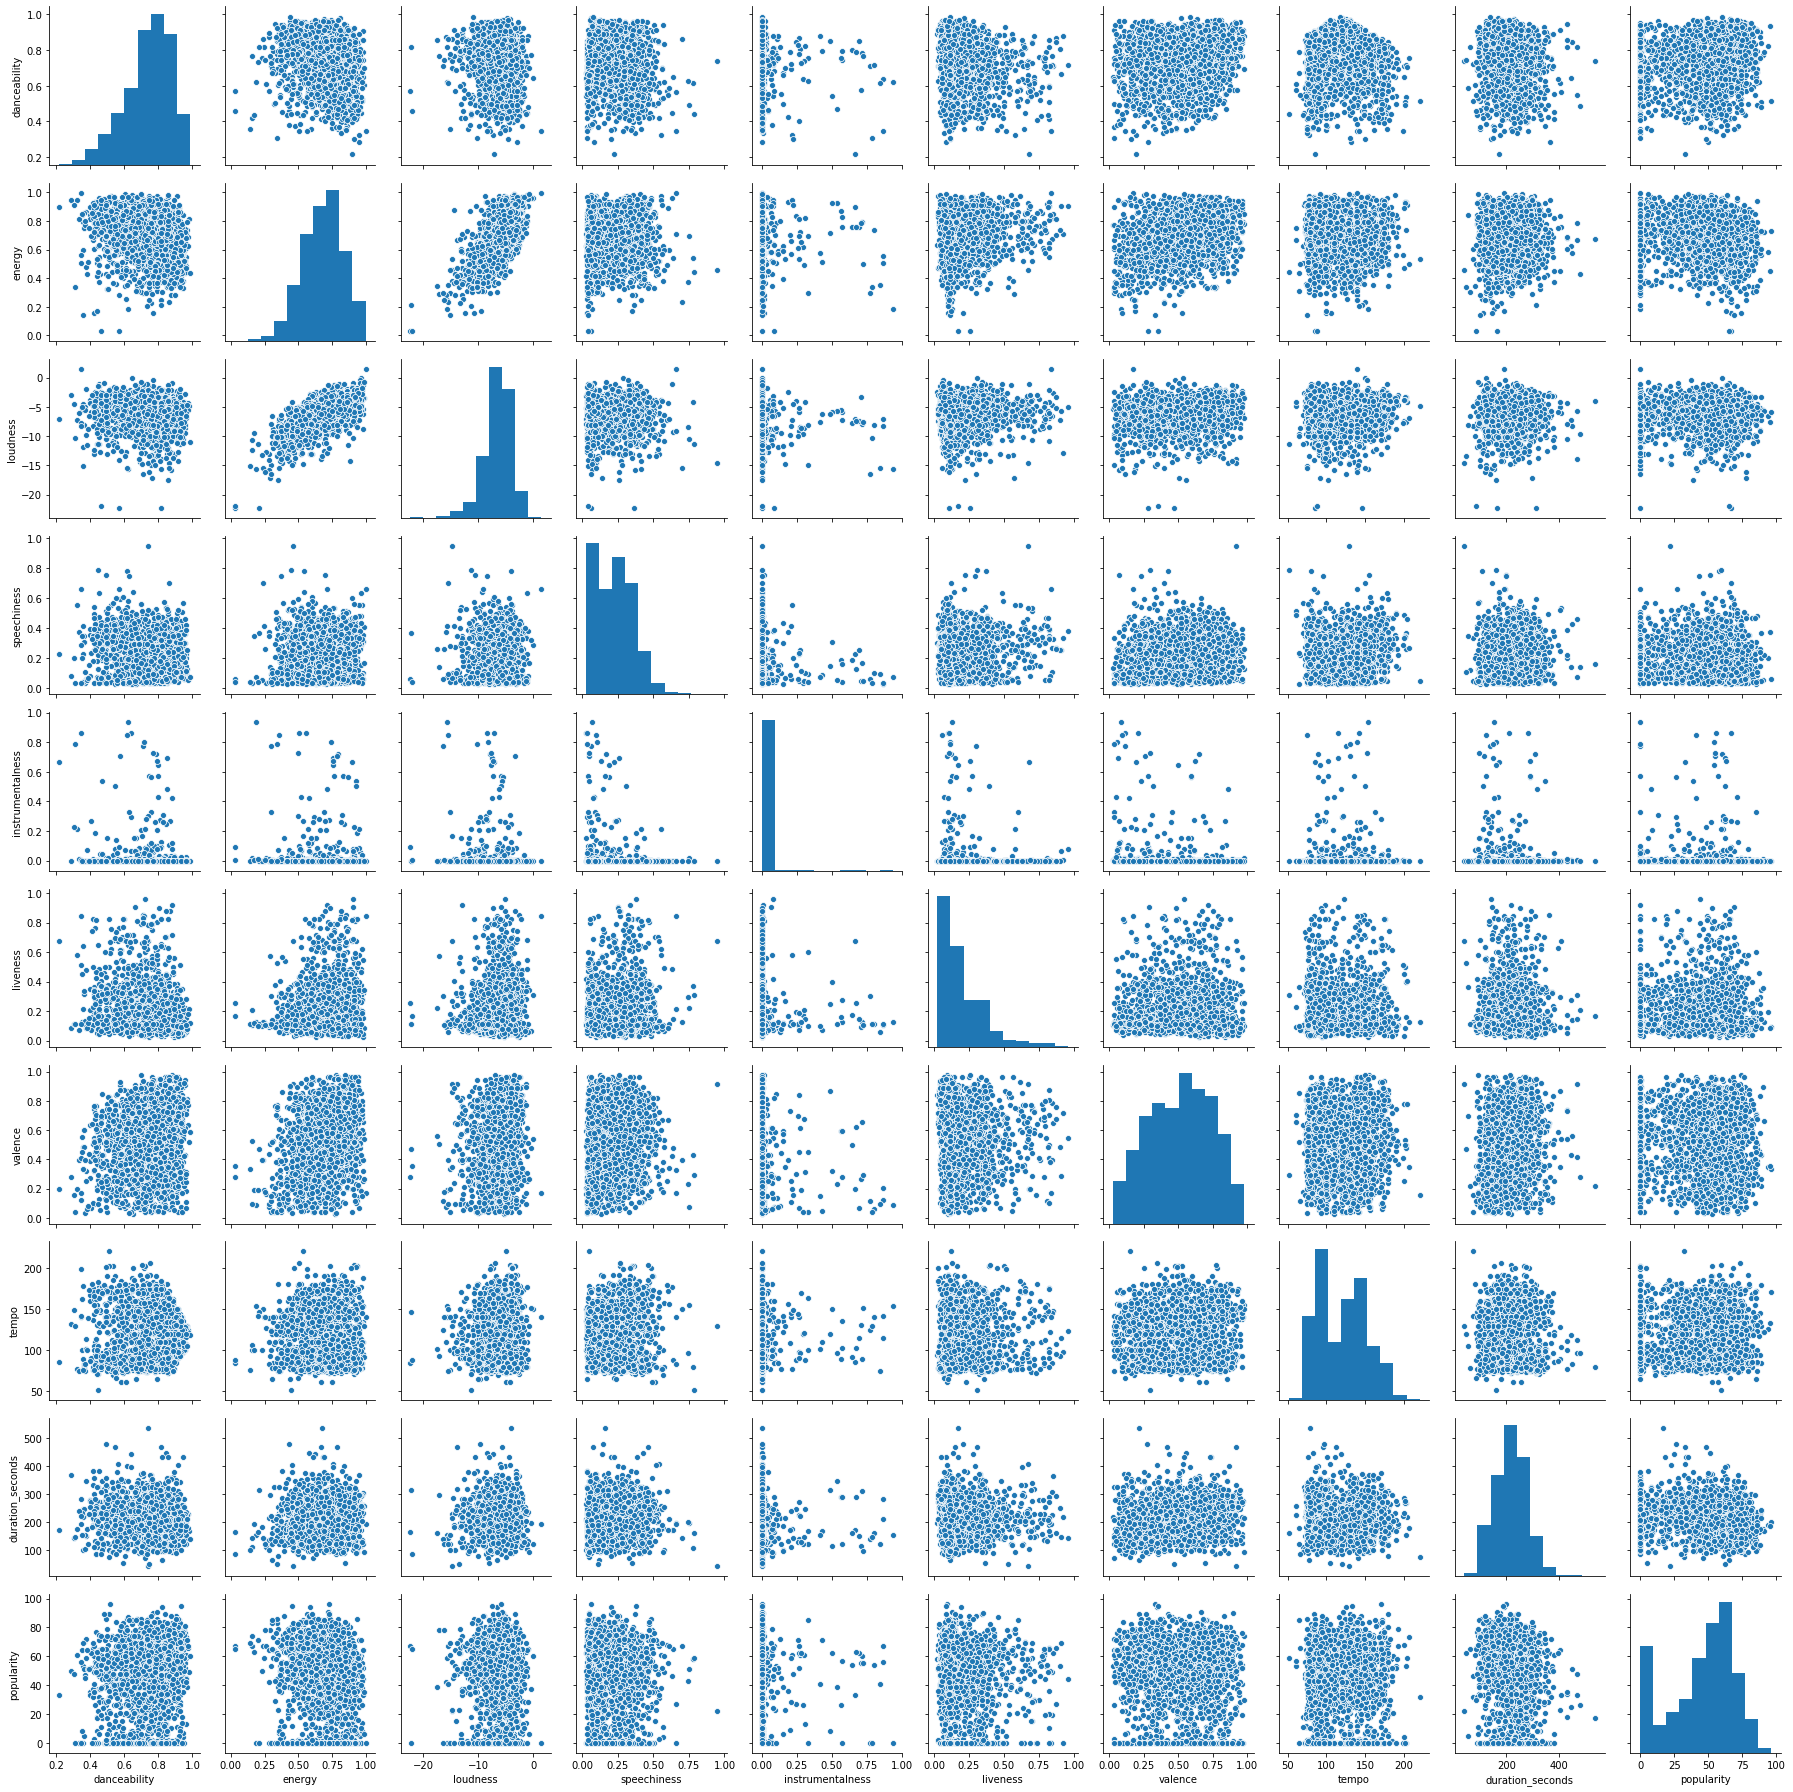

In [62]:
sns.pairplot(data=train[cont_vars + ['popularity']])
plt.tight_layout()

Takeaways: 
- We may find some useful clusters since there is some spread in the variable relationships
- There's no apparent linear relationships with popularity
- more data is definitely needed
- seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)

---

In [63]:
train.nunique()

artist                 714
album                 1375
release_date           808
track_name            1854
track_id              1962
danceability           532
energy                 589
key                     12
loudness              1710
mode                     2
speechiness            731
instrumentalness       619
liveness               753
valence                795
tempo                 1862
duration_ms           1858
time_signature           4
explicit                 2
popularity              95
disc_number              3
duration_seconds       291
duration_minutes         9
is_featured_artist       2
release_year            35
release_month           12
release_day             31
dtype: int64

Takeaways
- categorical variables
    - key
    - mode
    - time_signature
    - explicit
- continuous
    - danceability
    - energy
    - loudness
    - speechiness
    - instrumentalness
    - liveness
    - valence
    - tempo
    - duration_ms
    
---

In [64]:
train.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000
mean,0.737497,0.678565,5.221487,-6.506766,0.570774,0.226969,0.012267,0.205668,0.515568,120.363879,217826.919552,4.001527,0.867617,45.014766,1.008656,217.350305,3.129837,0.197556
std,0.133547,0.151513,3.792548,2.511081,0.495092,0.131929,0.077188,0.157874,0.225478,30.296988,61323.122588,0.244132,0.338993,24.222043,0.098001,61.316907,1.054281,0.398257
min,0.215000,0.027900,0.000000,-22.282000,0.000000,0.024900,0.000000,0.023500,0.029400,51.539000,41507.000000,1.000000,0.000000,0.000000,1.000000,41.000000,0.000000,0.000000
25%,0.664000,0.578000,1.000000,-7.818000,0.000000,0.108000,0.000000,0.100000,0.339750,93.349000,174360.250000,4.000000,1.000000,29.000000,1.000000,174.000000,2.000000,0.000000
50%,0.757000,0.690000,5.000000,-6.179000,1.000000,0.226000,0.000000,0.143000,0.528000,120.030000,217963.500000,4.000000,1.000000,51.000000,1.000000,217.000000,3.000000,0.000000
75%,0.838250,0.788000,9.000000,-4.894750,1.000000,0.321250,0.000015,0.282000,0.697000,143.987000,258413.500000,4.000000,1.000000,63.250000,1.000000,258.000000,4.000000,0.000000
max,0.985000,0.997000,11.000000,1.421000,1.000000,0.947000,0.935000,0.962000,0.977000,220.251000,537813.000000,5.000000,1.000000,96.000000,3.000000,537.000000,8.000000,1.000000


Takeaways: 
- We may find some useful clusters since there is some spread in the variable relationships
- There's no apparent linear relationships with popularity
- more data is definitely needed
- seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)

In [65]:
train.head()

,artist,album,release_date,track_name,track_id,danceability,energy,key,loudness,mode,...,time_signature,explicit,popularity,disc_number,duration_seconds,duration_minutes,is_featured_artist,release_year,release_month,release_day
2101,luniz,luniz - the lost tapes 2,2009-03-03,i got 5 on it,1rS31P08Cn64Rn7pnMh5S5,0.631,0.687,10,-7.870,0,...,4,1,0,1,245,4,0,2009,03,03
970,reason,new beginnings,2020-10-09,extinct,70hDklZStSazrExPjHJPfR,0.630,0.694,2,-6.593,1,...,4,1,58,1,222,3,0,2020,10,09
2028,hardo,trapnese,2016-11-25,who ya gang,5UShjdfool3o6TOMi2PeJR,0.924,0.645,10,-4.119,0,...,4,1,28,1,237,3,0,2016,11,25
1727,yella beezy,baccend beezy,2019-07-19,restroom occupied (feat. chris brown),0l9QUT8anYlBo4yD3PXfPM,0.711,0.683,6,-5.039,1,...,4,1,60,1,216,3,1,2019,07,19
1976,migos,culture,2017-01-27,t-shirt,7KOlJ92bu51cltsD9KU5I7,0.865,0.687,10,-3.744,0,...,4,1,68,1,242,4,0,2017,01,27


---
### Variable correlations

In [84]:
train[cont_vars + ['popularity']].corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
danceability        0.099652
tempo               0.005710
loudness           -0.011779
instrumentalness   -0.020451
speechiness        -0.029572
liveness           -0.052766
valence            -0.061328
energy             -0.136344
duration_seconds   -0.147408
Name: popularity, dtype: float64

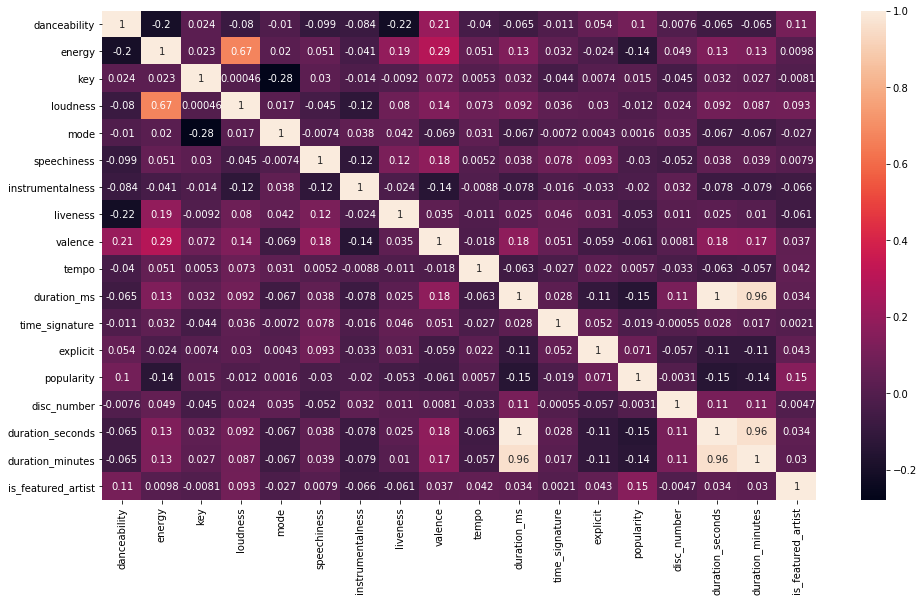

In [66]:
plt.rc('figure', figsize=(16,9))
sns.heatmap(train.corr(), annot=True)

> **Does liveness have any correlation with a song's popularity?**

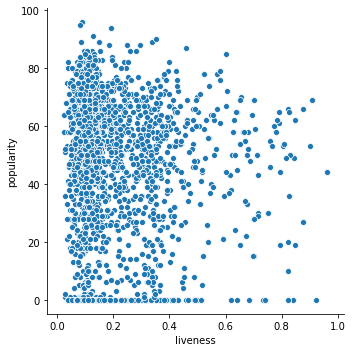

In [72]:
sns.relplot(x='liveness', y='popularity', data=train)

- $H_0$: There is no linear relationship between liveness and popularity.
- $H_a$: There is a linear relationship between liveness and popularity.

In [81]:
null = 'there is no linear relationship between liveness and popularity'

x = train.liveness
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

r = -0.05276567118711858
p = 0.01935828127448082
We reject the null that there is no linear relationship between liveness and popularity


Conclusion: Liveness and popularity have a small negative linear relationship